In [728]:
import pandas as pd

In [729]:
import numpy as np

In [730]:
import scipy

In [731]:
import matplotlib.pyplot as plt

In [732]:
import statsmodels.api as sm

In [733]:
from sklearn.linear_model import LinearRegression

In [734]:
import statsmodels.formula.api as smf

In [793]:
from statsmodels.formula.api import ols

In [805]:
from statsmodels.iolib.summary2 import summary_col

In [735]:
from linearmodels.panel import PanelOLS

In [736]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

In [737]:
ban_list = ['AFE', 'MIC', 'AFW', 'ARB', 'TSS', 'TLA', 'TMN', 'TSA', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'ECA', 'ECS', 'EMU', 'WLD', 'UMC', 'SST', 'SAS', 'PSS', 'PRE', 'NAC', 'MEA', 'MNA', 'LDC', 'LIC', 'LMC', 'LMY', 'LAC', 'LCN','LTE', 'OED', 'OSS', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'EUU', 'FCS', 'HIC', 'HPC', 'PST', 'TEC', 'TEA', 'SSA', 'SSF']

In [738]:
country_only_df = df2[~df2.economy.isin(ban_list)]
#dropped non-ISO economies

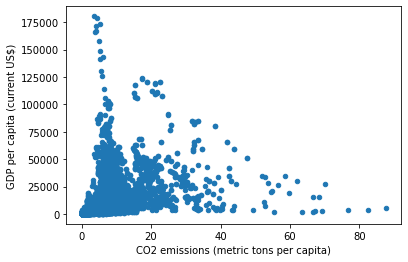

In [739]:
scatter = country_only_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [740]:
scatter.figure.savefig('initial scatter.pdf', dpi=300)

In [741]:
balanced_df = country_only_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])
#dropped na values and non-ISO economies. 

In [742]:
balanced_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
38,ABW,YR1986,NaN,NaN,NaN,2.868274,127.878602,NaN,13.8472,6.474660,NaN,NaN,NaN,0.0,6472.398709,NaN,NaN,NaN
39,ABW,YR1987,NaN,NaN,NaN,7.234613,143.941114,NaN,14.3017,8.943996,NaN,NaN,NaN,0.0,7885.158927,NaN,NaN,NaN
40,ABW,YR1988,NaN,NaN,NaN,10.027328,NaN,NaN,14.5499,11.000443,NaN,NaN,NaN,0.0,9765.909207,NaN,NaN,NaN
41,ABW,YR1989,NaN,NaN,NaN,10.634558,NaN,NaN,14.8981,11.871481,NaN,NaN,NaN,0.0,11392.269150,NaN,NaN,NaN
195,AFG,YR1970,NaN,NaN,NaN,0.149651,-679.915897,NaN,10202.0000,3042.256300,NaN,NaN,NaN,0.0,156.518771,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0000,5840.000000,NaN,NaN,NaN,0.0,1434.896277,NaN,NaN,NaN
22616,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
22617,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
22618,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN


In [743]:
main_df = balanced_df[balanced_df['time'] >= 'YR2000']
#for the balanced df we only want from YR2000 onwards. 
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

#main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [744]:
# not the best strategy, will figure out how to make a balanced data set?
X = main_df['CO2 emissions (metric tons per capita)']
Y = main_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.359
Model:                                      OLS   Adj. R-squared:                  0.359
Method:                           Least Squares   F-statistic:                     3059.
Date:                          Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                                  15:35:43   Log-Likelihood:                -60377.
No. Observations:                          5457   AIC:                         1.208e+05
Df Residuals:                              5455   BIC:                         1.208e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [745]:
main_df.to_csv('main_df.csv')

In [746]:
## I THINK THIS IS REPEATING, COULD DELETE

#X = main_up_df['CO2 emissions (metric tons per capita)']
#Y = main_up_df['GDP per capita (current US$)']
#X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
#predictions2 = model.predict(X) 


#print_model = model.summary()
#print(print_model)




229      3101.263397
230      3117.765054
231      3095.382335
232      3131.459660
233      3150.195619
            ...     
22615    4774.926168
22616    4781.541238
22617    4555.316184
22618    4427.192289
22619    4686.920143
Length: 5457, dtype: float64


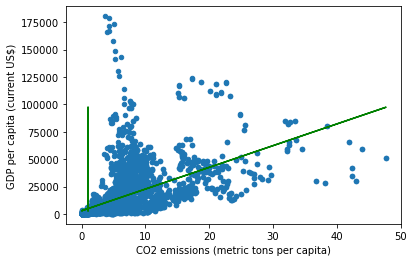

In [747]:
main_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')
plt.plot(X, predictions, color ='green')

print(predictions)



In [748]:
main_up_df= main_df[main_df['CO2 emissions (metric tons per capita)'] != 0]

In [749]:
main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/1374175315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])


In [750]:
main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])

C:\Users\Anjali\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/1265170634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])


In [808]:
co2 = main_up_df["log_co2"]
gdp = main_up_df["log_gdp"]
co2= sm.add_constant(co2)
# had to drop some variables that had co2 = 0 because then log(co2) was becoming minus infinity 

model2 = sm.OLS(gdp, co2).fit()
predictions2 = model2.predict(co2) 

print_model_2 = model2.summary()
print(print_model_2)

dfoutput = summary_col([model2],stars=True)
print(dfoutput)

dfoutput.as_latex() 

                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.428e+04
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        16:29:13   Log-Likelihood:                -6501.3
No. Observations:                5435   AIC:                         1.301e+04
Df Residuals:                    5433   BIC:                         1.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7559      0.012    623.802      0.0

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\\begin{table}\n\\caption{}\n\\label{}\n\\begin{center}\n\\begin{tabular}{ll}\n\\hline\n               & log\\_gdp   \\\\\n\\hline\nconst          & 7.7559***  \\\\\n               & (0.0124)   \\\\\nlog\\_co2       & 0.8638***  \\\\\n               & (0.0072)   \\\\\nR-squared      & 0.7245     \\\\\nR-squared Adj. & 0.7244     \\\\\n\\hline\n\\end{tabular}\n\\end{center}\n\\end{table}'

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.428e+04
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        15:59:22   Log-Likelihood:                -6421.3
No. Observations:                5435   AIC:                         1.285e+04
Df Residuals:                    5433   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2741      0.060   -103.767      0.0

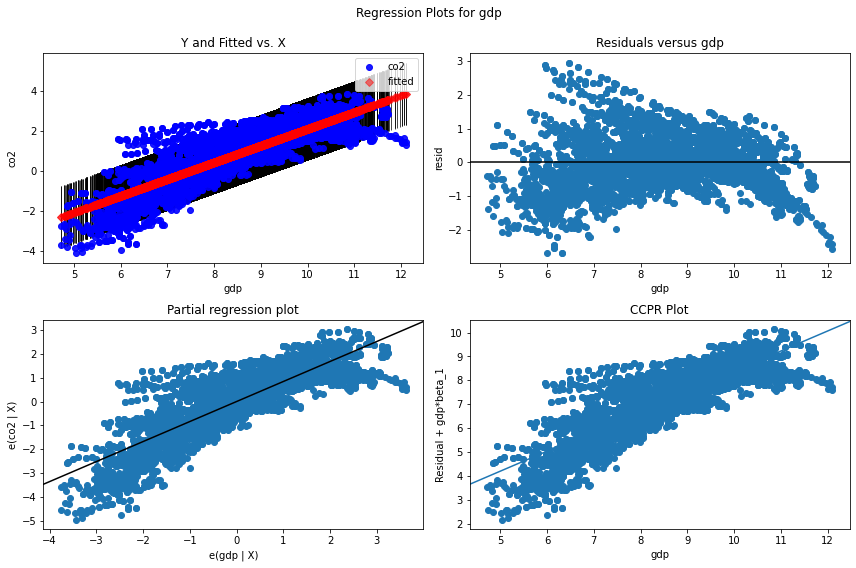

In [803]:
co2 = main_up_df["log_co2"].to_numpy().reshape(5435,1)
gdp = main_up_df["log_gdp"].to_numpy().reshape(5435,1)
model = ols('co2 ~ gdp', data=main_up_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model, 'gdp', fig=fig)

In [752]:
main_up_df.describe() #summary statistics

,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2
count,5435.000000,3524.000000,3616.000000,5435.000000,4693.000000,897.000000,5.435000e+03,5424.000000,897.000000,897.000000,254.000000,5314.000000,5435.000000,285.000000,2238.000000,641.000000,5435.000000,5435.000000
mean,29.239857,68.316261,2.271922,5.081704,-5745.879074,4593.753846,4.957306e+04,17558.906711,757.828651,1181.422631,1.011611,0.874770,13068.360020,84.202456,5.624084,27.119590,8.479918,0.838195
std,28.307853,28.795080,2.864850,5.847835,35870.658053,23043.516017,1.340216e+05,50218.523698,2882.816353,5406.617673,1.795234,3.608587,19326.155395,68.925793,10.300821,11.251793,1.524757,1.502497
min,0.000000,0.000000,0.054961,0.016313,-415197.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,111.927225,7.000000,0.000000,2.370000,4.717849,-4.115812
25%,5.346500,52.574422,1.764449,0.912534,-3038.418457,0.000000,3.680000e+03,1140.000000,0.000000,0.000000,0.015601,0.000000,1433.866947,29.900000,0.200000,18.400000,7.268130,-0.091529
50%,19.476500,77.198351,2.278244,3.198316,-117.269043,100.700000,1.182000e+04,4670.000000,1.000000,0.000000,0.173701,0.023595,4739.841710,61.800000,1.000000,24.800000,8.463759,1.162624
75%,47.043499,90.334130,2.686194,7.426104,561.077302,981.000000,4.063500e+04,14580.000000,267.900000,405.000000,1.044448,0.420092,16173.740050,130.700000,6.075000,33.700000,9.691144,2.004999
max,98.342903,100.000000,103.157895,47.699934,118677.593750,300896.000000,1.242150e+06,546990.000000,28055.800000,57054.000000,9.226586,68.681470,180366.715198,324.100000,77.400000,74.200000,12.102747,3.864930


229      5.145066
230      5.281635
231      5.090656
232      5.380578
233      5.499851
           ...   
22615    7.659385
22616    7.662608
22617    7.544961
22618    7.470457
22619    7.615334
Length: 5435, dtype: float64


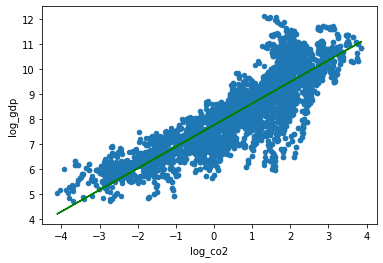

In [755]:
#scatter plot!

co2 = main_up_df["log_co2"].to_numpy().reshape(5435,1)
gdp = main_up_df["log_gdp"].to_numpy().reshape(5435,1)
model3 = LinearRegression()
model3.fit(co2, gdp)

main_up_df.plot.scatter('log_co2', 'log_gdp')
plt.plot(co2, model3.predict(co2), color ='green')
print(predictions2)




In [756]:
#main_up_df['Develop_Dummy'] = 0 if df['Salary'] < df['Salary'].median() else 1

In [757]:
mid_inc_countries = ['AGO', 'ALB', 'ARG', 'ARM', 'AZE', 'BEN', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BTN', 'BWA', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'FJI', 'FSM', 'GAB', 'GEO', 'GHA', 'GNQ', 'GRD', 'GTM', 'GUY', 'HND', 'IDN', 'IND', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBN', 'LBY', 'LCA', 'LKA', 'LSO', 'MAR', 'MDA', 'MDV', 'MEX', 'MHL', 'MRT', 'MKD', 'MYS', 'MMR', 'MNE', 'MNG', 'NGA', 'NIC', 'NPL', 'NAM', 'PAK', 'PER', 'PHL', 'PNG', 'PRY', 'PSE', 'RUS', 'STP', 'SEN', 'SLB', 'SLV', 'SRB', 'SUR', 'SWZ', 'THA', 'TUN', 'TUR', 'TUV', 'TKM', 'TLS', 'TON', 'TZA', 'UKR', 'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'ZAF', 'ZMB', 'ZWE']
hi_inc_countries = ['AND', 'ATG', 'AUS', 'AUT', 'BHS', 'BHR', 'ARE', 'BEL', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MLT', 'MUS', 'NOR', 'NLD', 'NRU','NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRT', 'QAT', 'ROU', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SYC', 'TTO', 'URY', 'USA']
lo_inc_countries = ['AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM']


In [758]:
def middle_income_func(economy):
    if economy in mid_inc_countries:
        return 1
    else:
        return 0

In [759]:
def low_income_func(economy):
    if economy in lo_inc_countries:
        return 1
    else:
        return 0

In [760]:
def high_income_func(economy):
    if economy in hi_inc_countries:
        return 1
    else:
        return 0

In [761]:
main_up_df['economy']

229      AFG
230      AFG
231      AFG
232      AFG
233      AFG
        ... 
22615    ZWE
22616    ZWE
22617    ZWE
22618    ZWE
22619    ZWE
Name: economy, Length: 5435, dtype: object

In [762]:
main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/1015916212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)


In [763]:
main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/1282217178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)


In [764]:
main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/379893192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)


In [765]:
main_up_df.to_csv('dummy.csv')

In [766]:
main_up_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy
229,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,0.032334,179.426579,NaN,NaN,NaN,5.189766,-3.022674,0,0,1
230,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,0.011594,190.683814,NaN,NaN,NaN,5.250617,-2.864563,0,0,1
231,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,0.010487,211.382074,NaN,NaN,NaN,5.353667,-3.085666,0,0,1
232,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,0.012873,242.031313,NaN,NaN,NaN,5.489067,-2.750014,0,0,1
233,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,0.015268,263.733602,NaN,NaN,NaN,5.574940,-2.611927,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,0.000000,1434.896277,NaN,NaN,NaN,7.268848,-0.111763,1,0,0
22616,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,0.000000,1445.069702,NaN,NaN,NaN,7.275913,-0.108033,1,0,0
22617,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,0.000000,1464.588957,133.0,NaN,NaN,7.289330,-0.244236,1,0,0
22618,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,0.000000,1235.189032,NaN,25.4,NaN,7.118979,-0.330491,1,0,0


In [811]:
gdp = main_up_df[["log_gdp", "Middle_dummy" , "High_dummy" ]]
co2 = main_up_df["log_co2"]
gdp= sm.add_constant(gdp)

model4 = sm.OLS(co2, gdp).fit()

print_model_4 = model4.summary()
print(print_model_4)


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     6228.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        16:33:52   Log-Likelihood:                -5873.2
No. Observations:                5435   AIC:                         1.175e+04
Df Residuals:                    5431   BIC:                         1.178e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.2329      0.079    -79.120   

In [768]:
main_up_df['Interaction_low'] =main_up_df['log_gdp'] * main_up_df['Low_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/3728632562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_low'] =main_up_df['log_co2'] * main_up_df['Low_dummy']


In [769]:
main_up_df['Interaction_high'] =main_up_df['log_gdp'] * main_up_df['High_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/3715964982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_high'] =main_up_df['log_co2'] * main_up_df['High_dummy']


In [770]:
# what if we flip our x and y and check causal implication of Kuznet's theory
X = main_up_df[["log_gdp", "Low_dummy" , "High_dummy", "Interaction_low", "Interaction_high" ]]
gdp = main_up_df["log_co2"]
X = sm.add_constant(X)

model5 = sm.OLS(gdp, X).fit()

print_model_5 = model5.summary()
print(print_model_5)

#somewhat talks about the Kuznet curve?

                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5108.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        15:37:07   Log-Likelihood:                -5192.4
No. Observations:                5435   AIC:                         1.040e+04
Df Residuals:                    5429   BIC:                         1.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9538      0.086  

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [771]:
def time_converter(time):
    new_time = int(time[2:])
    return new_time


In [772]:
main_up_df['time'] = main_up_df['time'].apply(time_converter)


C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/2410555573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['time'] = main_up_df['time'].apply(time_converter)


In [773]:
main_up_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
229,AFG,2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,NaN,NaN,NaN,5.189766,-3.022674,0,0,1,-3.022674,-0.0
230,AFG,2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,NaN,NaN,NaN,5.250617,-2.864563,0,0,1,-2.864563,-0.0
231,AFG,2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,NaN,NaN,NaN,5.353667,-3.085666,0,0,1,-3.085666,-0.0
232,AFG,2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,NaN,NaN,NaN,5.489067,-2.750014,0,0,1,-2.750014,-0.0
233,AFG,2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,NaN,NaN,NaN,5.574940,-2.611927,0,0,1,-2.611927,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,NaN,NaN,NaN,7.268848,-0.111763,1,0,0,-0.000000,-0.0
22616,ZWE,2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,NaN,NaN,NaN,7.275913,-0.108033,1,0,0,-0.000000,-0.0
22617,ZWE,2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,133.0,NaN,NaN,7.289330,-0.244236,1,0,0,-0.000000,-0.0
22618,ZWE,2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,NaN,25.4,NaN,7.118979,-0.330491,1,0,0,-0.000000,-0.0


In [774]:
panel_df = main_up_df.dropna(subset=['Methane emissions', 'Nitrous oxide emissions', ])

In [779]:
panel_df= panel_df[panel_df['Methane emissions'] != 0]

In [780]:
panel_df= panel_df[panel_df['Nitrous oxide emissions'] != 0]

In [781]:
data = panel_df.set_index(['economy'] ,['time'])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_20952/1233393285.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  data = panel_df.set_index(['economy'] ,['time'])


In [782]:
panel_df['log_me'] = np.log(main_df['Methane emissions'])           

C:\Users\Anjali\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [783]:
panel_df['log_nox'] = np.log(main_df['Nitrous oxide emissions'])

In [784]:
panel_df = panel_df.dropna(subset=['log_nox', 'log_me'])

In [785]:
panel_df = panel_df.dropna(subset = ['time'])

In [786]:
panel_df['year'] = pd.to_datetime(panel_df['time'], format='%Y')

In [787]:
# panel_df = panel_df.set_index('year', append=True)

In [788]:
# panel_df.index = panel_df.index.swaplevel(0,1)

In [789]:
panel_df = panel_df[panel_df['time'] >= 2000]

In [790]:
panel_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high,log_me,log_nox,year
229,AFG,2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,5.189766,-3.022674,0,0,1,-3.022674,-0.0,9.322776,8.216088,2002-01-01
230,AFG,2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,5.250617,-2.864563,0,0,1,-2.864563,-0.0,9.348362,8.253228,2003-01-01
231,AFG,2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,5.353667,-3.085666,0,0,1,-3.085666,-0.0,9.346618,8.245384,2004-01-01
232,AFG,2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,5.489067,-2.750014,0,0,1,-2.750014,-0.0,9.364777,8.286521,2005-01-01
233,AFG,2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,5.574940,-2.611927,0,0,1,-2.611927,-0.0,9.608445,8.308938,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,7.268848,-0.111763,1,0,0,-0.000000,-0.0,9.289152,8.672486,2014-01-01
22616,ZWE,2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,7.275913,-0.108033,1,0,0,-0.000000,-0.0,9.375007,8.778018,2015-01-01
22617,ZWE,2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,7.289330,-0.244236,1,0,0,-0.000000,-0.0,9.339613,8.714403,2016-01-01
22618,ZWE,2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,7.118979,-0.330491,1,0,0,-0.000000,-0.0,9.355306,8.745125,2017-01-01


In [791]:
panel_df = panel_df.set_index(['economy' ,'year'])

In [792]:
exog_vars = panel_df[["log_co2", "log_me", "log_nox"]]
end = panel_df['log_gdp']
exog = sm.add_constant(exog_vars)
model5 = PanelOLS(end, exog, entity_effects=True, time_effects = True)
fe_res = model5.fit()
print(fe_res)

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          PanelOLS Estimation Summary                           
Dep. Variable:                log_gdp   R-squared:                        0.2108
Estimator:                   PanelOLS   R-squared (Between):              0.2334
No. Observations:                5321   R-squared (Within):               0.2198
Date:                Wed, May 04 2022   R-squared (Overall):              0.2536
Time:                        15:39:56   Log-likelihood                    629.25
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      455.41
Entities:                         185   P-value                           0.0000
Avg Obs:                       28.762   Distribution:                  F(3,5115)
Min Obs:                       3.0000                                           
Max Obs:                       38.000   F-statistic (robust):             455.41
                            

In [ ]:
print(panel_df)

AttributeError: 'PanelOLS' object has no attribute 'model'

<Figure size 864x576 with 0 Axes>